In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import norm

plt.style.use('paper.mplstyle')

In [10]:
dfres = pd.read_csv('../csvs/resonant_summary.csv', index_col=0)
dfres = dfres[(dfres['Mean'] > 4) & (dfres['Mean'] < 7)]
dfres = dfres.sort_values(['KSpval'])
dfres.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
312,95,29720.734340,4.520192,0.144736,2.162044e-35,2972.104611,9.999895
47,140,6769.926289,4.127658,0.376338,7.466267e-29,677.023806,9.999540
50,143,27414.829370,4.443021,0.011862,2.130629e-25,2741.489865,9.999975
305,89,18514.720049,4.266680,0.018748,4.568072e-21,1851.492789,9.999888
210,334,15500.122677,4.211601,0.037430,8.571698e-21,1550.012268,10.000000


In [11]:
dfres.shape

(208, 7)

In [13]:
dfrand = pd.read_csv('../csvs/random_summary.csv', index_col=0)
dfrand = dfrand[(dfrand['Mean'] > 4) & (dfrand['Mean'] < 7)]
dfrand = dfrand.sort_values(['KSpval'])
dfrand.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
104,1829,129469.025972,5.132239,0.040250,8.257232e-67,12946.933774,9.999976
45,1364,50587.936965,4.704075,0.048083,5.529756e-63,5058.824873,9.999938
68,1601,27313.034961,4.454412,0.082612,2.807532e-60,2731.303496,10.000000
189,2215,62687.892720,4.468204,0.195881,5.327733e-48,425.825359,147.215029
219,2364,77526.185819,4.931914,0.091978,7.847683e-40,7752.622046,9.999996


In [14]:
dfrand.shape

(246, 7)

In [15]:
def quantile_hist(quantile, df, dataset, bins):
    quant = df[df['KSpval'] < df.quantile(quantile)['KSpval']]
    ID = int(quant.loc[quant['KSpval'].idxmax()]['ID'])
    
    if dataset == 'random':
        csvpath = '../csvs/random_distributions/'
        csv = csvpath+'Sys_{0}_1000.csv'.format(ID)
    elif dataset == 'resonant':
        csvpath = '../csvs/resonant_distributions/'
        csv = csvpath+'Res_sys_{0}_500.csv'.format(ID)
    else:
        raise AttributeError("typo")
        
    data = pd.read_csv(csv, index_col = 0)
    data = data[data["t"]<1e8]
    logt = np.log10(data["t"])

    vals, edges = np.histogram(logt, bins, density=True)
    mean, sigma =  df[df["ID"]==int(ID)][["Mean", "Sigma"]].values[0]
    x = np.linspace(3,8,100)
    gaussian = norm.pdf(x, mean, sigma)
    
    return vals, edges, gaussian

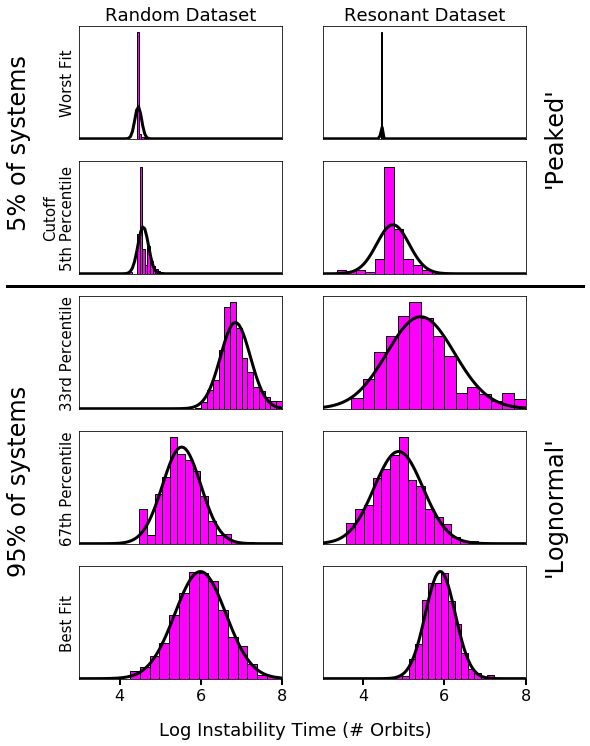

In [31]:
bins=15
quantiles = [0.01, 0.05, 0.33, 0.67, 1.]

fig, axarr = plt.subplots(ncols=2, nrows=len(quantiles), figsize=(8,12))

for i, quantile in enumerate(quantiles):
    col=0
    vals, edges, gaussian = quantile_hist(quantile, dfrand, 'random', bins)
    axarr[i, col].bar(edges[:-1], vals, ec='k', fc='magenta', width=np.diff(edges), align="edge")
    axarr[i, col].plot(np.linspace(3,8,100), gaussian, linewidth = 3, c='k')
    
    col=1
    vals, edges, gaussian = quantile_hist(quantile, dfres, 'resonant', bins)
    axarr[i, col].bar(edges[:-1], vals, ec='k', fc='magenta', width=np.diff(edges), align="edge")
    axarr[i, col].plot(np.linspace(3,8,100), gaussian, linewidth = 3, c='k')

for ax in axarr.flatten():
    ax.set_xlim([3,8])
    ax.tick_params(
        axis='both',          
        which='both',    
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False)

for ax in axarr[-1,:]:
    ax.tick_params(
        axis='x',          
        which='both',    
        bottom=True,
        labelbottom=True)
    
axarr[0,0].set_ylabel('Worst Fit', fontsize=15)
axarr[1,0].set_ylabel('Cutoff\n5th Percentile', fontsize=15)
axarr[2,0].set_ylabel('33rd Percentile', fontsize=15)
axarr[3,0].set_ylabel('67th Percentile', fontsize=15)
axarr[4,0].set_ylabel('Best Fit', fontsize=15)
   
axarr[0,0].set_title('Random Dataset', fontsize=18)
axarr[0,1].set_title('Resonant Dataset', fontsize=18)
plt.figtext(0.5,0.06, "Log Instability Time (# Orbits)", figure=fig, ha="center", size=18)
plt.figtext(0.,0.25, "95% of systems", figure=fig, rotation='vertical', size=24)
plt.figtext(0.,0.65, "5% of systems", figure=fig, rotation='vertical', size=24)
plt.figtext(.93,0.25, "'Lognormal'", figure=fig, rotation='vertical', size=24)
plt.figtext(.93,0.7, "'Peaked'", figure=fig, rotation='vertical', size=24)


line = plt.Line2D([0,1],[0.58,0.58], transform=fig.transFigure, color="black")
fig.add_artist(line)
fig.savefig('fig1.pdf', bbox_inches='tight')

In [32]:
cutoffres = dfres.quantile(0.05)['KSpval']
cutoffres

1.7691168522712816e-07

In [33]:
cutoffrand = dfrand.quantile(0.05)['KSpval']
cutoffrand

4.636831044889583e-27

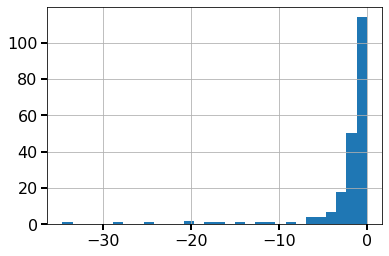

In [34]:
np.log10(dfres['KSpval']).hist(bins=30)

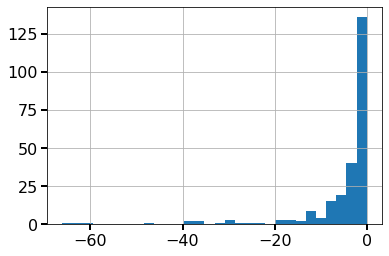

In [35]:
np.log10(dfrand['KSpval']).hist(bins=30)